<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Подготовка-данных-к-анализу" data-toc-modified-id="Подготовка-данных-к-анализу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных к анализу</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Определение выгодного тарифа для телеком компании

Федеральный опреатор сотовой связи решил проанализировать  два тарифных плана "Смарт" и "Ультра"

Необходимо понять какой тариф приносит больше денег, чтобы скорректировать рекламный бюджет

Для анализа нам предоставлены данные о звонках 500 пользователей оператора сотовой связи за один год.


**Цель исследования:** 

  - Определить какой тариф доходнее.
  
**Ход исследования**

Данные мы получим из файлов `users.csv`  `calls.csv`  `internet.csv`  `messages.csv`  `tariffs.csv`

Перед началом анализа ознакомимся с данными, проверим на возможные ошибки и аномалии

На этапе предобработки исправим ошибки, приведем данные к нужным типам

Подготовим данные к анализу и проанализируем

 - Таким образом исследование пройдет по следующим этапам:
 
    - обзор данных
    - предобработка данных
    - подготовка данных к анализу
    - анализ данных
    - проверка гипотез
    

## Изучение данных из файла

In [1]:
import pandas as pd    # импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

 - Прочитаем файлы и сохраним

 - Получим общюю информацию

In [2]:
df_users = pd.read_csv('/datasets/users.csv')

In [3]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
df_calls = pd.read_csv('/datasets/calls.csv')

In [6]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [7]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [8]:
df_internet = pd.read_csv('/datasets/internet.csv', index_col=0)

In [9]:
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [10]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [11]:
df_messages = pd.read_csv('/datasets/messages.csv')

In [12]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [13]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [14]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [15]:
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [16]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### Вывод

Информация для анализа предоставлена в пяти таблицах

Обзор данных выявил некоторые аномалии:

 - В таблицах `df_users` `df_calls` `df_internet` `df_messages` информация о датах представлена как  `object` 
   Изменим тип данных на `datetime64`

 - В таблицах `df_calls` `df_internet` `df_messages` информация об `id` звонков, интернет-сессий и сообщений записана `object`
   Изменим тип данных на числовой `int64`

 - В таблице с интернет трафиком двойная индексация. Уберем ее.
 
Устраним проблемы в данных, чтобы двигаться дальше. 



## Предобработка данных

Приведем данные к нужным типам

Проверим на дубликаты

In [17]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d') # изменение типа данных
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

In [18]:
df_users.dtypes # проверка

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

In [19]:
df_users['age'].describe() # изучим описание столбца

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

In [20]:
sorted(df_users['city'].unique()) # изучим описание столбца

['Архангельск',
 'Астрахань',
 'Балашиха',
 'Барнаул',
 'Белгород',
 'Брянск',
 'Владивосток',
 'Владикавказ',
 'Владимир',
 'Волгоград',
 'Волжский',
 'Вологда',
 'Воронеж',
 'Грозный',
 'Екатеринбург',
 'Иваново',
 'Ижевск',
 'Иркутск',
 'Казань',
 'Калининград',
 'Калуга',
 'Кемерово',
 'Киров',
 'Кострома',
 'Краснодар',
 'Красноярск',
 'Курган',
 'Курск',
 'Липецк',
 'Магнитогорск',
 'Махачкала',
 'Москва',
 'Мурманск',
 'Набережные Челны',
 'Нижневартовск',
 'Нижний Новгород',
 'Нижний Тагил',
 'Новокузнецк',
 'Новороссийск',
 'Новосибирск',
 'Омск',
 'Оренбург',
 'Орёл',
 'Пенза',
 'Пермь',
 'Петрозаводск',
 'Подольск',
 'Ростов-на-Дону',
 'Рязань',
 'Самара',
 'Санкт-Петербург',
 'Саранск',
 'Саратов',
 'Севастополь',
 'Смоленск',
 'Сочи',
 'Ставрополь',
 'Стерлитамак',
 'Сургут',
 'Тамбов',
 'Тверь',
 'Тольятти',
 'Томск',
 'Тула',
 'Тюмень',
 'Улан-Удэ',
 'Ульяновск',
 'Уфа',
 'Хабаровск',
 'Химки',
 'Чебоксары',
 'Челябинск',
 'Череповец',
 'Чита',
 'Якутск',
 'Ярославль']

In [21]:
df_users.duplicated().sum() # проверили на дубликаты

0

In [22]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d') # изменили типы данных
df_calls['id'] = df_calls['id'].astype('int') 

In [23]:
df_calls.dtypes  # проверка

id                    int32
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

In [24]:
df_calls.duplicated().sum() # проверка на дубликаты

0

In [25]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d') # меняем тип данных
df_internet['id'] = df_internet['id'].astype('int') 

In [26]:
df_internet.dtypes # провекра

id                       int32
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

In [27]:
df_internet.duplicated().sum() # проверили дубликаты

0

In [28]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d') # изменили тип данных
df_messages['id'] = df_messages['id'].astype('int') 

In [29]:
df_messages.dtypes # проверили

id                       int32
message_date    datetime64[ns]
user_id                  int64
dtype: object

In [30]:
df_messages.duplicated().sum() #  поверили таблицу на дубликаты

0

## Подготовка данных к анализу

Выручку необходимо посчитать в среднем по каждому клиенту по месяцам

Выполним следующие действия:

 - в таблицы со звонками, сообщениями и интернет-трафиком добавим столбец `month`
 - создадим сводные таблицы для расчета для каждого пользователя по месяцам: 
    -  количества и длительности звонков
    -  количества сообщений
    -  объем интернет-трафика
 - в таблице с пользователями оставим колонки, необходимые для анализа, остальные удалим
 - объединим таблицы

In [31]:
df_calls['month'] = df_calls['call_date'].dt.month # добавили столбец month
df_calls.head()

,id,call_date,duration,user_id,month
0,10000,2018-07-25,0.00,1000,7
1,10001,2018-08-17,0.00,1000,8
2,10002,2018-06-11,2.85,1000,6
3,10003,2018-09-21,13.80,1000,9
4,10004,2018-12-15,5.18,1000,12


In [32]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  int32         
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2)
memory usage: 7.0 MB


Компания оператор сотовой связи всегда округляет секунды до минут. Каждый звонок округляется отдельно.

In [33]:
df_calls['duration_round'] = np.ceil(df_calls['duration'])   # округлили звонки
df_calls.head()

,id,call_date,duration,user_id,month,duration_round
0,10000,2018-07-25,0.00,1000,7,0.0
1,10001,2018-08-17,0.00,1000,8,0.0
2,10002,2018-06-11,2.85,1000,6,3.0
3,10003,2018-09-21,13.80,1000,9,14.0
4,10004,2018-12-15,5.18,1000,12,6.0


In [34]:
df_calls_group = df_calls.pivot_table(index=['user_id', 'month'], values='duration_round', aggfunc=['count', 'sum'])
# посчитали количество звонков и длительность
df_calls_group

count            sum
              duration_round duration_round
user_id month                              
1000    5                 22          159.0
        6                 43          172.0
        7                 47          340.0
        8                 52          408.0
        9                 58          466.0
...                      ...            ...
1498    10                41          247.0
1499    9                  9           70.0
        10                68          449.0
        11                74          612.0
        12                69          492.0

[3174 rows x 2 columns]

In [35]:
df_calls_group.columns = ['calls_count', 'calls_minute'] # переименовали колонки
df_calls_group.reset_index().head()

,user_id,month,calls_count,calls_minute
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0


In [36]:
df_internet['month'] = df_internet['session_date'].dt.month   # добавили столбец month
df_internet.head()

,id,mb_used,session_date,user_id,month
0,10000,112.95,2018-11-25,1000,11
1,10001,1052.81,2018-09-07,1000,9
2,10002,1197.26,2018-06-25,1000,6
3,10003,550.27,2018-08-22,1000,8
4,10004,302.56,2018-09-24,1000,9


In [37]:
df_internet_group = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum') 
#  посчитали длительность  интернет сессий
df_internet_group.head()

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91

Компания оператор сотовой связи для рассчета веб-трафика отдельные сессии не считает. Общая сумма за месяц округляется в большую сторону. 1025 мегабайт огруглятся до 2 гигабайт

In [38]:
df_internet_group['gb_used'] = np.ceil(df_internet_group['mb_used'] / 1024) # добавим столбец с гигабайтами

In [39]:
df_internet_group = df_internet_group.reset_index()  
df_internet_group.head()

,user_id,month,mb_used,gb_used
0,1000,5,2253.49,3.0
1,1000,6,23233.77,23.0
2,1000,7,14003.64,14.0
3,1000,8,14055.93,14.0
4,1000,9,14568.91,15.0


In [40]:
df_messages['month'] = df_messages['message_date'].dt.month    # добавили столбец month
df_messages.head()

,id,message_date,user_id,month
0,10000,2018-06-27,1000,6
1,10001,2018-10-08,1000,10
2,10002,2018-08-04,1000,8
3,10003,2018-06-16,1000,6
4,10004,2018-12-05,1000,12


In [41]:
df_messages_group = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count') 
# посчитали количество сообщений

In [42]:
df_messages_group.columns = ['message_count'] #  переименовали колонки
df_messages_group.reset_index().head()

,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [43]:
df = df_users.drop(['age', 'churn_date', 'first_name', 'last_name', 'reg_date'], axis=1) 
# удалили столбцы, которые не нужны для анализа

In [44]:
df.columns = ['user_id', 'city', 'tariff_name'] # переименовали колонки
df.head()

,user_id,city,tariff_name
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra


In [45]:
df_new = df.merge(df_calls_group, on='user_id', how='outer') # объединяем таблицы
df_new.head()

,user_id,city,tariff_name,calls_count,calls_minute
0,1000,Краснодар,ultra,22.0,159.0
1,1000,Краснодар,ultra,43.0,172.0
2,1000,Краснодар,ultra,47.0,340.0
3,1000,Краснодар,ultra,52.0,408.0
4,1000,Краснодар,ultra,58.0,466.0


In [46]:
df_new = df_new.merge(df_internet_group, on=['user_id'], how='outer') # объединяем таблицы
df_new.head()

,user_id,city,tariff_name,calls_count,calls_minute,month,mb_used,gb_used
0,1000,Краснодар,ultra,22.0,159.0,5.0,2253.49,3.0
1,1000,Краснодар,ultra,22.0,159.0,6.0,23233.77,23.0
2,1000,Краснодар,ultra,22.0,159.0,7.0,14003.64,14.0
3,1000,Краснодар,ultra,22.0,159.0,8.0,14055.93,14.0
4,1000,Краснодар,ultra,22.0,159.0,9.0,14568.91,15.0


In [47]:
df_new = df_new.merge(df_messages_group, on=['user_id', 'month'], how='outer')  # объединяем таблицы
df_new.head()

,user_id,city,tariff_name,calls_count,calls_minute,month,mb_used,gb_used,message_count
0,1000,Краснодар,ultra,22.0,159.0,5.0,2253.49,3.0,22.0
1,1000,Краснодар,ultra,43.0,172.0,5.0,2253.49,3.0,22.0
2,1000,Краснодар,ultra,47.0,340.0,5.0,2253.49,3.0,22.0
3,1000,Краснодар,ultra,52.0,408.0,5.0,2253.49,3.0,22.0
4,1000,Краснодар,ultra,58.0,466.0,5.0,2253.49,3.0,22.0


В таблицу о тарифах добавили столбец с объемом интернет-трафика, включенного в абонентскую плату(в гигабайтах)

In [48]:
df_tariffs['gb_per_month_included'] = df_tariffs['mb_per_month_included'] / 1024
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


In [49]:
df_new = df_new.merge(df_tariffs, on='tariff_name', how='outer')  # объединяем таблицы
df_new.head()

,user_id,city,tariff_name,calls_count,calls_minute,month,mb_used,gb_used,message_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,Краснодар,ultra,22.0,159.0,5.0,2253.49,3.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0
1,1000,Краснодар,ultra,43.0,172.0,5.0,2253.49,3.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0
2,1000,Краснодар,ultra,47.0,340.0,5.0,2253.49,3.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0
3,1000,Краснодар,ultra,52.0,408.0,5.0,2253.49,3.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0
4,1000,Краснодар,ultra,58.0,466.0,5.0,2253.49,3.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0


**Теперь у нас есть таблица со всей необходимой информацией для рассчетов**

 - Рассчитаем выручку с каждого пользователя по месяцам. Для этого напишем функцию
 - Посчитаем стоимость звонков, стоимость сообщений, стоимость интернет-трафика для каждого пользователя по месяцам
 - Добавим в таблицу столбец с расчетами


In [50]:
def how_much_cost(row): # функция для рассчета стоимости 
    income = 0
    if row['calls_minute'] > row['minutes_included']:
        income += (row['calls_minute'] - row['minutes_included']) * row['rub_per_minute']
    if row['gb_used'] > row['gb_per_month_included']:
        income += (row['gb_used'] - row['gb_per_month_included']) * row['rub_per_gb']
    if row['message_count'] > row['messages_included']:
        income += (row['message_count'] - row['messages_included']) * row['rub_per_message']
    else:
        income += 0        
    return income

In [51]:
row_values = [120.0, 1000.0, 1.0, 33.0, 30.0, 150.0, 60.0, 1000.0, 1.0]
row_columns = ['calls_minute', 'minutes_included', 'rub_per_minute','gb_used', 'gb_per_month_included', 'rub_per_gb'\
               ,'message_count', 'messages_included', 'rub_per_message' ]  
row = pd.Series(data=row_values, index=row_columns)
print(how_much_cost(row))

450.0


In [52]:
df_new['income'] = (df_new.apply(how_much_cost, axis=1)) + df_new['rub_monthly_fee']
df_new.head()

,user_id,city,tariff_name,calls_count,calls_minute,month,mb_used,gb_used,message_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,income
0,1000,Краснодар,ultra,22.0,159.0,5.0,2253.49,3.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0,1950.0
1,1000,Краснодар,ultra,43.0,172.0,5.0,2253.49,3.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0,1950.0
2,1000,Краснодар,ultra,47.0,340.0,5.0,2253.49,3.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0,1950.0
3,1000,Краснодар,ultra,52.0,408.0,5.0,2253.49,3.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0,1950.0
4,1000,Краснодар,ultra,58.0,466.0,5.0,2253.49,3.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0,1950.0


## Анализ данных

 - Создадим таблицы отдельно для каждого тарифа. Отфильтруем строки.

In [53]:
df_new_smart = df_new[df_new['tariff_name'] == 'smart']

In [54]:
df_new_smart = df_new_smart.loc[:, 'user_id': 'income']

In [55]:
df_new_smart.head()

,user_id,city,tariff_name,calls_count,calls_minute,month,mb_used,gb_used,message_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,income
7826,1001,Москва,smart,59.0,430.0,11.0,18429.34,18.0,NaN,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,15.0,1150.0
7827,1001,Москва,smart,63.0,414.0,11.0,18429.34,18.0,NaN,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,15.0,1150.0
7828,1001,Москва,smart,59.0,430.0,12.0,14036.66,14.0,NaN,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,15.0,550.0
7829,1001,Москва,smart,63.0,414.0,12.0,14036.66,14.0,NaN,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,15.0,550.0
7830,1002,Стерлитамак,smart,15.0,117.0,6.0,10856.82,11.0,4.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,15.0,550.0


In [56]:
df_new_smart['rub_monthly_fee'].isna().sum()

0

In [57]:
df_new_smart['income'].describe()

count    18189.000000
mean      1262.927099
std        744.423146
min        550.000000
25%        595.000000
50%       1040.000000
75%       1740.000000
max       6770.000000
Name: income, dtype: float64

In [58]:
df_new_ultra = df_new[df_new['tariff_name'] == 'ultra']

In [59]:
df_new_ultra = df_new_ultra.loc[:, 'user_id': 'income']

In [60]:
df_new_ultra.head()

,user_id,city,tariff_name,calls_count,calls_minute,month,mb_used,gb_used,message_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,income
0,1000,Краснодар,ultra,22.0,159.0,5.0,2253.49,3.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0,1950.0
1,1000,Краснодар,ultra,43.0,172.0,5.0,2253.49,3.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0,1950.0
2,1000,Краснодар,ultra,47.0,340.0,5.0,2253.49,3.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0,1950.0
3,1000,Краснодар,ultra,52.0,408.0,5.0,2253.49,3.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0,1950.0
4,1000,Краснодар,ultra,58.0,466.0,5.0,2253.49,3.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0,1950.0


In [61]:
df_new_ultra['rub_monthly_fee'].isna().sum()

0

In [62]:
df_new_ultra['income'].describe()

count    7826.000000
mean     2064.100434
std       360.537674
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: income, dtype: float64

**Проанализируем данные**

 - Общая информация о тарифах

**Тариф "Смарт"**
 - ежемесячная плата 550 рублей
 - включено 500 минут разговора, 50 сообщений, 15 Гб интернет-трафика
 
 - стоимость услуг сверх тарифного пакета
    - минута разговора 3 рубля
    - сообщение 3 рубля
    - 1 Гб интернет-трафика 200 рублей
    
**Тариф "Ультра"**
 - ежемесячная плата 1950 рублей
 - включено 3000 минут разговора, 1000 сообщений, 30 Гб интернет-трафика
 
 - стоимость услуг сверх тарифного пакета
    - минута разговора 1 рубль
    - сообщение 1 рубль
    - 1 Гб интернет-трафика 150 рублей

 - Изучим сколько минут разговора, сколько сообщений и какой объем интернет-трафика требуется пользователям каждого тарифа в месяц
 
Построим графики распределения длительности звонков для каждого тарифа

In [63]:
df_new_smart['calls_minute'].describe() # получили описание столбца 

count    18183.000000
mean       417.755926
std        184.444696
min          0.000000
25%        286.000000
50%        428.000000
75%        544.000000
max       1435.000000
Name: calls_minute, dtype: float64

In [64]:
df_new_ultra['calls_minute'].describe()

count    7792.000000
mean      550.534908
std       296.578648
min         0.000000
25%       326.000000
50%       536.000000
75%       757.000000
max      1673.000000
Name: calls_minute, dtype: float64

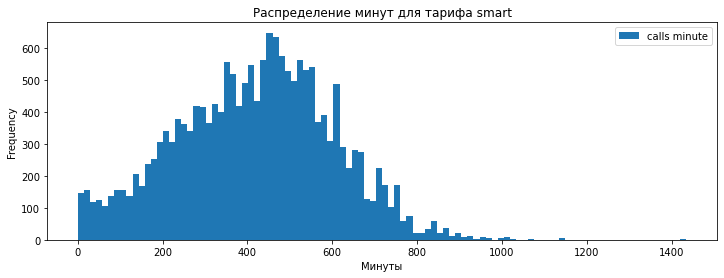

In [65]:
df_new_smart.plot(kind='hist', y='calls_minute', bins=100, range=(0, 1435), label='calls minute',
                  figsize=(12,4), title='Распределение минут для тарифа smart')
plt.xlabel('Минуты');

Вывод

В среднем пользователям тарифа Смарт требуется 400-420 минут минут разговора в месяц. Но почти треть пользователей не укладывается в предоставленный и оплачивает дополнительные минуты разговора.


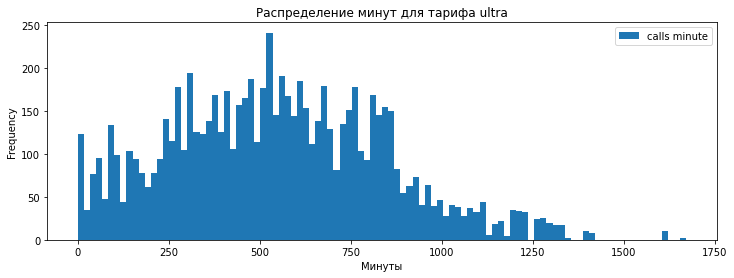

In [66]:
df_new_ultra.plot(kind='hist', y='calls_minute', bins=100, range=(0, 1673), label='calls minute'\
                  , figsize=(12,4),title='Распределение минут для тарифа ultra')
plt.xlabel('Минуты');

Вывод

Гистограмма более широкая и плоская, в сравнении с предыдущей. Выборка очень неоднородна. Много как коротких, так и продолжительных звонков

 - Построим график, чтобы сравнить среднюю длительность звонка для каждого тарифа

In [67]:
df_new_smart_calls = df_new_smart.pivot_table(index='month', values='calls_minute', aggfunc='mean')
df_new_ultra_calls = df_new_ultra.pivot_table(index='month', values='calls_minute', aggfunc='mean')

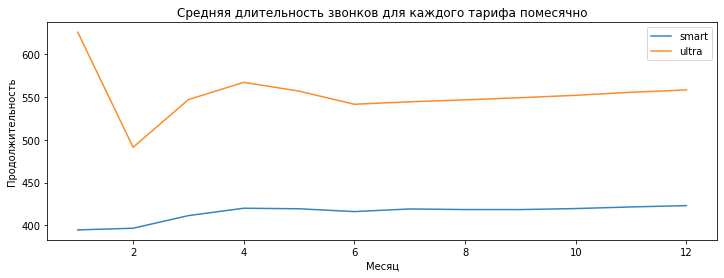

In [68]:
ax = df_new_smart_calls.plot(
    y='calls_minute',
    alpha=0.9,
    label='smart',
)
df_new_ultra_calls.plot(
    y='calls_minute',
    alpha=0.9,
    label='ultra',
    ax=ax,
    legend=True,
    figsize=(12,4), title='Средняя длительность звонков для каждого тарифа помесячно', xlabel='Месяц', ylabel='Продолжительность'
);

**Вывод**

Пользователи тарифа Ультра тратят значительно больше времени на разговор, чем пользователи тарифа Смарт. Однако, даже самая большая цифра, использованного времени, (таких пользователей мало) всего лишь половина включенного в тариф времени.
Основная масса пользователей Ультра использует лишь, примерно, шестую часть предоплаченного времени.

В тарифе Смарт большая часть пользователей, в среднем укладывается в предоставленный лимит.

 - Построим  распределения сообщений для каждого тарифа

In [69]:
df_new_smart['message_count'].describe()  # получили описание столбца

count    15825.000000
mean        39.217820
std         26.171143
min          1.000000
25%         19.000000
50%         35.000000
75%         56.000000
max        143.000000
Name: message_count, dtype: float64

In [70]:
df_new_ultra['message_count'].describe()

count    6107.000000
mean       58.926314
std        43.531400
min         1.000000
25%        23.000000
50%        50.000000
75%        84.000000
max       224.000000
Name: message_count, dtype: float64

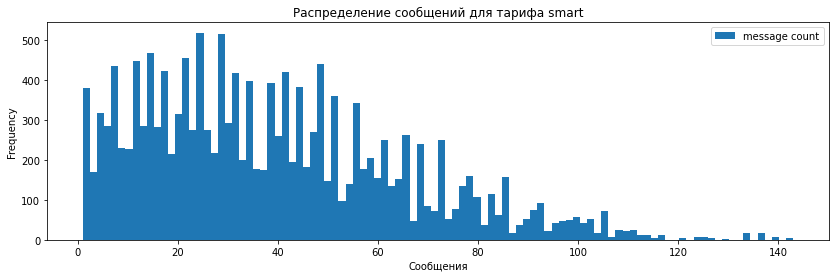

In [71]:
df_new_smart.plot(kind='hist', y='message_count', bins=100, range=(1, 143), label='message count', figsize=(14,4)\
                 ,title='Распределение сообщений для тарифа smart')
plt.xlabel('Сообщения');

Вывод

В среднем пользователи тарифа Cмарт укладываются в лимит отправляя около 20 сообщений. Но чаще эта число больше. Гистограмма скошена вправо.  Пользователи Смарт часто доплачивают за превышение лимита.

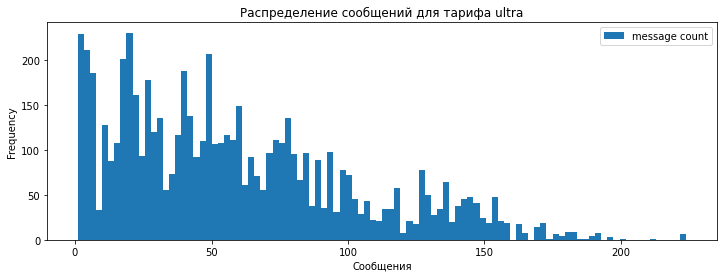

In [72]:
df_new_ultra.plot(kind='hist', y='message_count', bins=100, range=(1, 224), label='message count', figsize=(12,4)\
                 , title='Распределение сообщений для тарифа ultra')
plt.xlabel('Сообщения');

Вывод

Очень большой разброс в значениях. в тарифе Ультра. Значительное количество пользователей отправляет примерно 10-20 сообщений при лимите в 1000.
В среднем пользователи отправляют около 60 сообщений. Максимальное  количество, которое было отправлено 224. 1000 сообщений так никто и не отправил

 - Построим график, чтобы сравнить среднее число сообщений для каждого тарифа

In [73]:
df_new_smart_message = df_new_smart.pivot_table(index='month', values='message_count', aggfunc='mean')
df_new_ultra_message = df_new_ultra.pivot_table(index='month', values='message_count', aggfunc='mean')

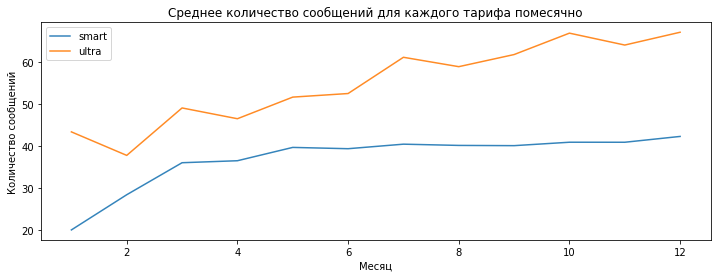

In [74]:
ax = df_new_smart_message.plot(
    y='message_count',
    alpha=0.9,
    label='smart',
)
df_new_ultra_message.plot(
    y='message_count',
    alpha=0.9,
    label='ultra',
    ax=ax,
    legend=True,
    figsize=(12,4), title='Среднее количество сообщений для каждого тарифа помесячно',\
    xlabel='Месяц', ylabel='Количество сообщений'
);
  

**Вывод**

В среднем пользователи Смарт остаются в рамках лимита по количеству сообщений не больше 50.
Пользователи Ультра отправляют в  среднем чуть больше сообщений 60-70, при этом не используя и 10 части предоставленных возможностей.
На графике наблюдается заметный рост среднего числа сообщений в тарифе Ультра

 - Построим  распределения интернет-трафика для каждого тарифа

In [75]:
df_new_smart['gb_used'].describe()   # получили описание столбца 

count    18188.000000
mean        16.302122
std          5.514577
min          0.000000
25%         13.000000
50%         17.000000
75%         20.000000
max         38.000000
Name: gb_used, dtype: float64

In [76]:
df_new_ultra['gb_used'].describe()

count    7817.000000
mean       19.742484
std         9.530500
min         0.000000
25%        13.000000
50%        19.000000
75%        27.000000
max        49.000000
Name: gb_used, dtype: float64

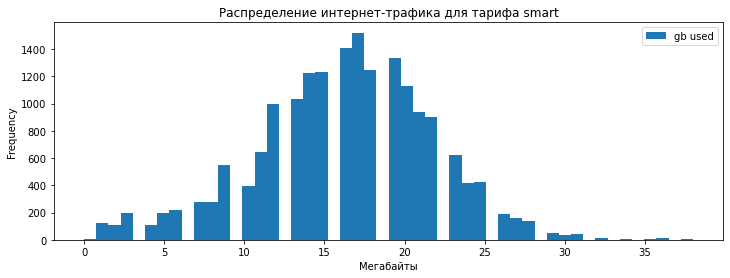

In [77]:
df_new_smart.plot(kind='hist', y='gb_used', bins=50, range=(0, 38), label='gb used', figsize=(12,4)\
                  , title='Распределение интернет-трафика для тарифа smart')
plt.xlabel('Мегабайты');

Вывод

Большинство пользователей тарифа Смарт, как правило, доплачивают за интернет.   16Гб в среднем (при лимите 15Гб) необходимо большему числу клиентов

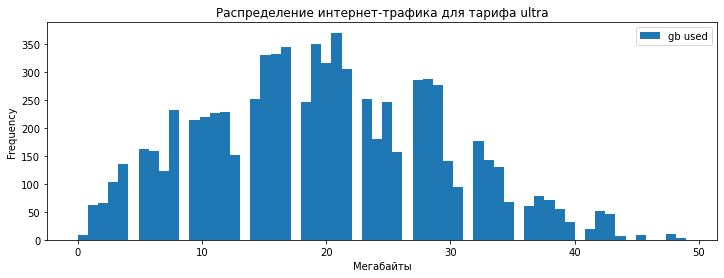

In [78]:
df_new_ultra.plot(kind='hist', y='gb_used', bins=60, range=(0, 49), label='gb used', figsize=(12,4)\
                  , title='Распределение интернет-трафика для тарифа ultra')
plt.xlabel('Мегабайты');

Вывод

Пользователям тарифа Ультра, как правило хватает гигабайтов, которые включены в тариф
Большинство использует 18-22 Гб трафика
И все же некоторому числу пользователей приходится доплачивать за перерасход Гб

 - Построим график, чтобы сравнить средний трафик для каждого тарифа по месяцам

In [79]:
df_new_smart_gb = df_new_smart.pivot_table(index='month', values='gb_used', aggfunc='mean')
df_new_ultra_gb = df_new_ultra.pivot_table(index='month', values='gb_used', aggfunc='mean')

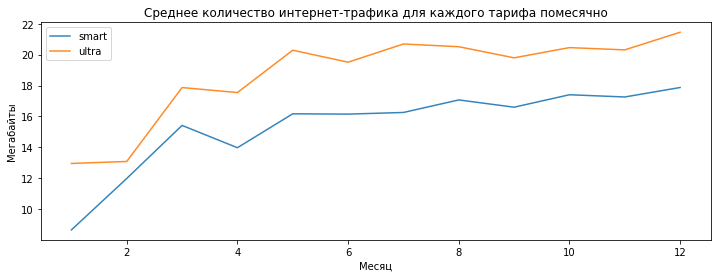

In [80]:
ax = df_new_smart_gb.plot(
    y='gb_used',
    alpha=0.9,
    label='smart',
)
df_new_ultra_gb.plot(
    y='gb_used',
    alpha=0.9,
    label='ultra',
    ax=ax,
    legend=True,
    figsize=(12,4), title='Среднее количество интернет-трафика для каждого тарифа помесячно',\
    xlabel='Месяц', ylabel='Мегабайты'
);

Вывод

Пользователи тарифа Ультра активнее используют интернет трафик по сравнению с пользователями тарифа Смарт.
Даже включенных в тариф гигабайт не всегда хватает для удовлетворения всех запросов

**Общий вывод**

Пользователи тарифа Ультра в сравнении с пользователями Смарт больше звонят, больше пишут сообщений, больше используют интернет-трафик (это очень хорошо заметно по графикам), однако укладываются в границы тарифов.

Пользователи  Смарт менее активные пользователи. Несмотря на то, что включенных в тариф минут и сообщений  значительно меньше в сравнениии с Ультрой, в среднем пользователи не превышают тарифных ограничений.

Этого нельзя сказать об интернет трафике. Пользователи Смарт, доплачивают за  превышение тарифа.
Пользователям Ультра также не всегда хватает, включенных гигабайтов.

Выборку для тарифа Ультра отличает очень сильный разброс значений. Гистограммы по звонкам и сообщениям скошены вправо, видимо лимит предоставляет возможность не ограничивать себя. Использование интернета отличается более равномерным распределением.




## Проверка гипотез

Поверим гипотезы:

 - средняя выручка тарифов Ультра и Смарт различаются
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
 
 Применим метод о равенстве среднего двух генеральных совокупностей

In [81]:
print(np.var(df_new_ultra['income'])) # рассчитали дисперсию, чтобы решить, нужно ли применять equal_var=False
print(np.var(df_new_smart['income']))

129970.80463310055
554135.3533087443


In [82]:
print(df_new_ultra.shape)
print(df_new_smart.shape)

(7826, 18)
(18189, 18)


Дисперсии сильно отличаются. И таблицы значительно отличаются по размеру. Используем параметр equal_var=False

Сформулируем гипотезы

 - Нулевая гипотеза - средняя выручка  пользователей тарифов "Ультра" и "Смарт"  - равны

 - Альтернативная гипотеза - выручки различаются

In [83]:
alpha = .05  # задали критический уровень статистической значимости

In [84]:
results = st.ttest_ind(df_new_smart['income'], df_new_ultra['income'], equal_var=False)
print(results.pvalue)

0.0


In [85]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


In [86]:
smart_income_mean = df_new_smart['income'].mean()
ultra_income_mean = df_new_ultra['income'].mean()
print('Средняя выручка тарифа Смарт', round(smart_income_mean))
print('Средняя выручка тарифа Ультра', round(ultra_income_mean))

Средняя выручка тарифа Смарт 1263
Средняя выручка тарифа Ультра 2064


Вывод

Отвергли нулевую гипотезу. У нас очень маленькая пероятность получить, наблюдаемое на выборке значение, при условии, что нулевая гипотеза верна.

Дополнительно сравнили среднее доходов тарифов, чтобы уточнить какой тариф доходнее.

Тариф Ультра приносит больше выручки по сравнению с тарифом Смарт. Разница статистически значима.

 - Для проверки второй гипотезы создадим таблицы для пользователей из Москвы и для пользователей из других регионов

 - Отфильтруем строки по условию


In [87]:
df_for_moscov = df_new[df_new['city'] == 'Москва']

In [88]:
df_for_moscow = df_for_moscov.loc[:, 'user_id': 'income']

In [89]:
df_for_moscow.head() 

,user_id,city,tariff_name,calls_count,calls_minute,month,mb_used,gb_used,message_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,income
64,1003,Москва,ultra,55.0,380.0,8.0,8565.21,9.0,37.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0,1950.0
65,1003,Москва,ultra,134.0,961.0,8.0,8565.21,9.0,37.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0,1950.0
66,1003,Москва,ultra,108.0,855.0,8.0,8565.21,9.0,37.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0,1950.0
67,1003,Москва,ultra,115.0,824.0,8.0,8565.21,9.0,37.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0,1950.0
68,1003,Москва,ultra,108.0,802.0,8.0,8565.21,9.0,37.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0,1950.0


In [90]:
df_for_moscow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4868 entries, 64 to 25755
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4868 non-null   int64  
 1   city                   4868 non-null   object 
 2   tariff_name            4868 non-null   object 
 3   calls_count            4868 non-null   float64
 4   calls_minute           4868 non-null   float64
 5   month                  4868 non-null   float64
 6   mb_used                4868 non-null   float64
 7   gb_used                4868 non-null   float64
 8   message_count          3876 non-null   float64
 9   messages_included      4868 non-null   float64
 10  mb_per_month_included  4868 non-null   float64
 11  minutes_included       4868 non-null   float64
 12  rub_monthly_fee        4868 non-null   float64
 13  rub_per_gb             4868 non-null   float64
 14  rub_per_message        4868 non-null   float64
 15  ru

In [91]:
df_not_for_moscov = df_new[df_new['city'] != 'Москва']

In [92]:
df_not_for_moscow = df_not_for_moscov.loc[:, 'user_id': 'income']

In [93]:
df_not_for_moscow.head()

,user_id,city,tariff_name,calls_count,calls_minute,month,mb_used,gb_used,message_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,income
0,1000,Краснодар,ultra,22.0,159.0,5.0,2253.49,3.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0,1950.0
1,1000,Краснодар,ultra,43.0,172.0,5.0,2253.49,3.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0,1950.0
2,1000,Краснодар,ultra,47.0,340.0,5.0,2253.49,3.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0,1950.0
3,1000,Краснодар,ultra,52.0,408.0,5.0,2253.49,3.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0,1950.0
4,1000,Краснодар,ultra,58.0,466.0,5.0,2253.49,3.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,30.0,1950.0


In [94]:
df_not_for_moscow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 26025
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                21158 non-null  int64  
 1   city                   21147 non-null  object 
 2   tariff_name            21147 non-null  object 
 3   calls_count            21107 non-null  float64
 4   calls_minute           21107 non-null  float64
 5   month                  21148 non-null  float64
 6   mb_used                21137 non-null  float64
 7   gb_used                21137 non-null  float64
 8   message_count          18067 non-null  float64
 9   messages_included      21147 non-null  float64
 10  mb_per_month_included  21147 non-null  float64
 11  minutes_included       21147 non-null  float64
 12  rub_monthly_fee        21147 non-null  float64
 13  rub_per_gb             21147 non-null  float64
 14  rub_per_message        21147 non-null  float64
 15  ru

In [95]:
df_for_moscow['income'].describe()

count    4868.000000
mean     1555.653862
std       714.828895
min       550.000000
25%       883.000000
50%      1750.000000
75%      1950.000000
max      5321.000000
Name: income, dtype: float64

In [96]:
df_not_for_moscow['income'].describe()

count    21147.000000
mean      1492.037074
std        756.620636
min        550.000000
25%        750.000000
50%       1550.000000
75%       1950.000000
max       6770.000000
Name: income, dtype: float64

Посчитаем пропуски, иначе статистический тест не срабатывает

In [97]:
print(df_for_moscow['income'].isna().sum())  
print(df_not_for_moscow['income'].isna().sum())

0
11


In [98]:
df_not_for_moscow[df_not_for_moscow['income'].isna()].head() # запросили строки с пропусками

,user_id,city,tariff_name,calls_count,calls_minute,month,mb_used,gb_used,message_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,income
26015,1273,NaN,NaN,NaN,NaN,5.0,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26016,1273,NaN,NaN,NaN,NaN,6.0,NaN,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26017,1273,NaN,NaN,NaN,NaN,7.0,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26018,1273,NaN,NaN,NaN,NaN,8.0,NaN,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26019,1273,NaN,NaN,NaN,NaN,9.0,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Заполним пропуски нулями. Возможно тарифом не пользовались или абонентская плата не была внесена.

In [99]:
df_not_for_moscow['income'] = df_not_for_moscow['income'].fillna(0) 

In [100]:
df_not_for_moscow['income'].isna().sum() 

0

In [101]:
print(np.var(df_for_moscow['income'])) # рассчитали дисперсию, чтобы решить, нужно ли применять equal_var=False
print(np.var(df_not_for_moscow['income']))

510875.382037263
573306.8829114955


In [102]:
print('Относительное различие в дисперсиях  {:.1%}'\
      .format(np.var(df_not_for_moscow['income']) / np.var(df_for_moscow['income']) - 1))

Относительное различие в дисперсиях  12.2%


Таблицы существенно отличаются по размеру. Разница в дисперсиях больше 5 %, укажем параметр equal_var=False при проведении теста.

Сформулируем гипотезы

 - Нулевая гипотеза - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов

 - Альтернативная гипотеза - средние выручки пользователей из Москвы и пользователей из других регионов отличаются 

In [103]:
alpha = .05  # задали задали критический уровень статистической значимости

In [104]:
results = st.ttest_ind(df_for_moscow['income'], df_not_for_moscow['income'], equal_var=False)

In [105]:
print(results.pvalue)

2.1771392895073102e-08


In [106]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


In [107]:
df_for_moscow_mean = df_for_moscow['income'].mean()
df_not_for_moscow_mean = df_not_for_moscow['income'].mean()
print('Средняя выручка пользователей Москвы', round(df_for_moscow_mean))
print('Средняя выручка пользователей из других регионов', round(df_not_for_moscow_mean))

Средняя выручка пользователей Москвы 1556
Средняя выручка пользователей из других регионов 1491


Вывод

Не получилось отвергнуть нулевую гипотезу 

Хотя средняя выручка для жителей Москвы и других регионов неодинакова, тест не показал статистически значимой разницы. 

## Вывод

Задачей данного исследования было проанализировать два тарифных плана сотового оператора и оптеделить какой приносит больший доход

Исследование проходило по следующим этапам:

  **Обзор данных**
  
 - Информация для анализа предоставлена в пяти таблицах:
   - информация о пользователях
   - информация о звонках
   - информация о сообщениях
   - информация об интернет-сессиях
   - информация о тарифах
  
  **Предобработка данных**
  
  
  - На этапе предобработки изменили типы данных
  
   **Подготовка данных к анализу**
   
   
 -  В таблицы со звонками, сообщениями и интернет-трафиком добали столбец с номером месяца, чтобы читать выручку помесячно
 -  В сводных таблицах рассчитали среднюю длительность звонков, количество сообщений, объем интернет-трафика для каждого тарифа
    в разрезе месяцев.
 -  Объединили таблицы.
 -  На основе работы функций добавили столбцы и рассчитапли среднюю помесячную выручку для каждого пользователя
   
   **Анализ данных**
   
   
  - Для анализа создали таблицы - на основе объединенной -  для каждого тарифа отдельно
  - Изучили сколько минут разговора, сколько сообщений и какой объем интернет-трафика требуется пользователю каждого 
    тарифа в месяц
     - Построили гистограммы и графики

   
   **Проверка гипотез**
   
   Провели статистический тест и проверили гипотезы
    
   - Средняя выручка пользователей тарифа Ультра и тарифа Смарт различаются
   - Средняя выручка пользователей из Москвы  отличается от выручки пользователей из других регионов. 

**По результатам исследования установили следующее**:

 - Пользователи тарифа Ультра в сравнении с пользователями Смарт больше звонят, больше пишут сообщений, больше используют интернет-трафик однако укладываются в границы тарифов.

 - Пользователи  Смарт менее активные пользователи. Несмотря на то, что включенных в тариф минут и сообщений  значительно меньше в сравнениии с Ультрой, в среднем пользователи не превышают тарифных ограничений.
 
 - Тариф Ультра приносит больше выручки по сравнению с тарифом Смарт. Разница статистически значима.
 
 - Статистический тест не выявил значимой разницы между выручкой пользователей Москвы и других регионов.


